This notebooks explores whether or not there is a relationship between transport and the CIL Area.

To start, look at Seal Island and JJA means.

In [4]:
import glob
import os

from geopy.distance import distance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import transport

In [5]:
lon_min=-56
lat_min=53
lon_max=-52
lat_max=56

In [6]:
data_dir='/ocean/handres/glorys12/'
mask = xr.open_dataset(os.path.join(data_dir,'statics_subset_mask_bathy.nc'))
mask = mask.sel(latitude=slice(lat_min, lat_max),
                longitude=slice(lon_min, lon_max))
coords = xr.open_dataset(os.path.join(data_dir,'statics_subset_coordinates.nc'))
coords = coords.sel(latitude=slice(lat_min, lat_max),
                    longitude=slice(lon_min, lon_max),
                   )

In [7]:
transects = pd.read_csv('../../data/sections_info.txt', delim_whitespace=True,
                       names=['Shortname', 'Longname', 'lon1', 'lat1', 'lon2', 'lat2', 'Dir-E', 'Dir-N'],
                       header=0)

In [8]:
seal = transects[transects.Shortname=='SI']
seal

,Shortname,Longname,lon1,lat1,lon2,lat2,Dir-E,Dir-N
14,SI,Seal-Isle,-55.917366,53.146169,-52.007608,54.392137,1,-1


# Load pre-computed CIL area

In [9]:
f = '../../data/csv/transects/SealIsland/SealIsland_JJA_CIL_Area.csv'
cil = pd.read_csv(f)
cil=cil[cil['Year']!=2020]
cil

,Unnamed: 0,Year,Model,Area (km^2),season
0,0,1993,GLORYS12,22.423494,JJA
1,0,1994,GLORYS12,19.234691,JJA
2,0,1995,GLORYS12,17.369038,JJA
3,0,1996,GLORYS12,16.298039,JJA
4,0,1997,GLORYS12,13.729423,JJA
5,0,1998,GLORYS12,9.380478,JJA
6,0,1999,GLORYS12,10.988887,JJA
7,0,2000,GLORYS12,18.720204,JJA
8,0,2001,GLORYS12,12.536169,JJA
9,0,2002,GLORYS12,12.058613,JJA


# Compute annual mean transport
Sanity check with Nicolas' calculations

In [10]:
year='[1,2][0-9][0-9][0-9]'
f = glob.glob(os.path.join(data_dir,f'Allvars*{year}_daily_annmean.nc'))
d = xr.open_mfdataset(f)
dsel = d.sel(
             latitude=slice(lat_min, lat_max),
             longitude=slice(lon_min, lon_max))

In [11]:
tbar, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                        mask.mask, coords.e3t, seal)

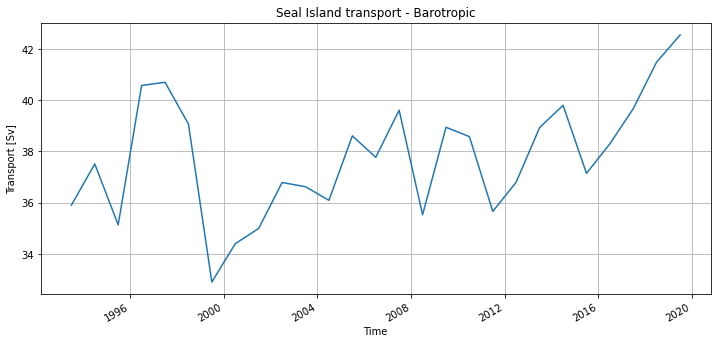

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(tbar/1e6).plot(ax=ax)
ax.set_title('Seal Island transport - Barotropic')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


Match with Nicolas not that good...
Did he only select data from the depth of the shelf?

## Full current transport

In [13]:
t, across, along = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal,
                                     barotropic=False)

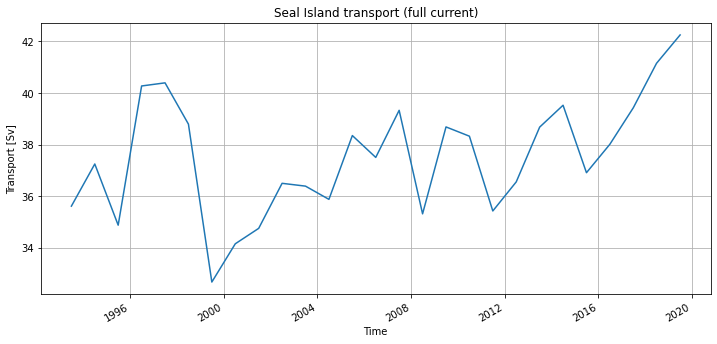

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(t/1e6).plot(ax=ax)
ax.set_title('Seal Island transport (full current)')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


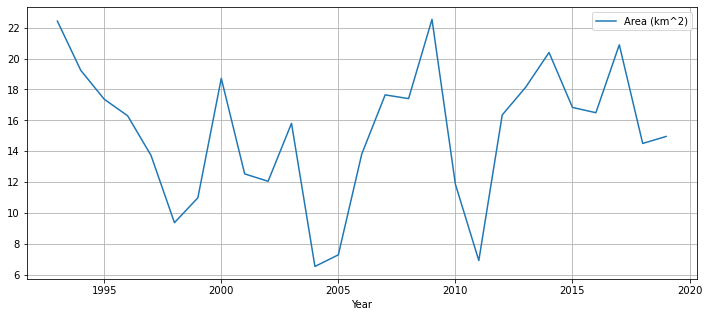

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

cil.plot(x='Year', y='Area (km^2)', ax=ax)
ax.grid()

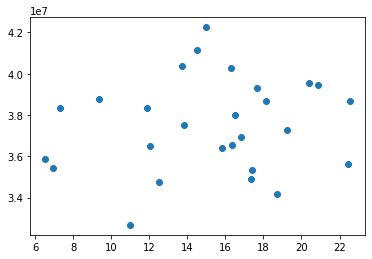

In [16]:
plt.scatter(cil['Area (km^2)'],t.values)

# JJA mean transport


In [17]:
data_dir='/home/soontiensn/data/cmems2020-oceanstatereport/data/netcdf/GLORYSv12/monthly-means/'
f = glob.glob(os.path.join(data_dir,'*_JJA.nc'))
d = xr.open_mfdataset(f)
dsel = d.sel(
             latitude=slice(lat_min, lat_max),
             longitude=slice(lon_min, lon_max))

In [18]:
dsel

<xarray.Dataset>
Dimensions:    (time: 27, bnds: 2, longitude: 49, latitude: 37, depth: 50)
Coordinates:
  * time       (time) datetime64[ns] 1993-07-16T12:00:00 ... 2019-07-16T12:00:00
  * longitude  (longitude) float32 -56.0 -55.92 -55.83 ... -52.17 -52.08 -52.0
  * latitude   (latitude) float32 53.0 53.08 53.17 53.25 ... 55.83 55.92 56.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 37, 49), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 37, 49), meta=np.ndarray>
Attributes: (12/29)
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    title:                     daily mean fields from Global Ocean Physics An...
    easting:                   longitude
    ...                        ...
    z_min:                     0.494025
    z_max:                     5727.917
    NCO:                       4.7.2
    nco_openmp_thread_number:  1
    frequency:                 mon
    CDO:                       Climate Data Operators version 2.0.3 (https://...

In [19]:
t, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal,
                                     )

In [20]:
t

<xarray.DataArray (time: 27)>
dask.array<add, shape=(27,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-07-16T12:00:00 ... 2019-07-16T12:00:00
    longitude  float64 -55.92
    latitude   float64 53.15
    depth      float32 0.494
Attributes:
    units:       m^3/s
    short_name:  transport
    long_name:   Volume Transport

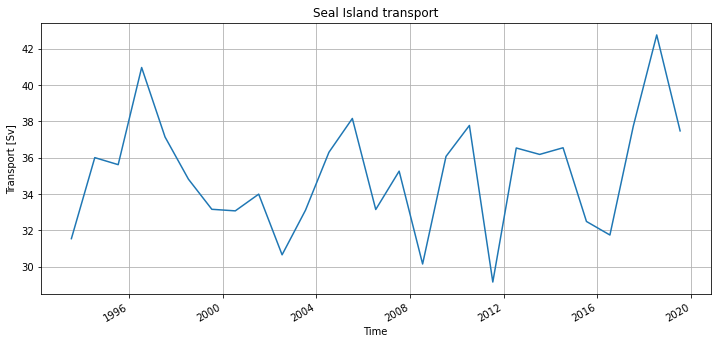

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
(t/1e6).plot(ax=ax)
ax.set_title('Seal Island transport')
ax.set_ylabel('Transport [Sv]')
ax.set_xlabel('Time')
ax.grid()


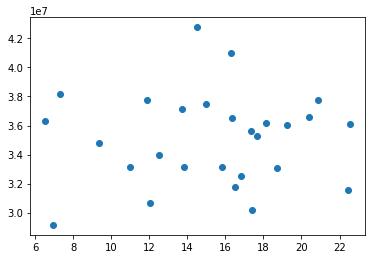

In [22]:
plt.scatter(cil['Area (km^2)'],t.values)

# Full current

In [23]:

tfull, along, across = transport.get_transect_transport(dsel.uo, dsel.vo, 
                                     mask.mask, coords.e3t, seal, barotropic=False
                                     )

(3000.0, 0.0)

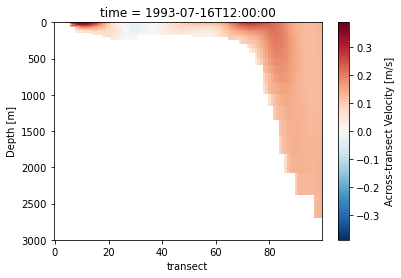

In [24]:
fig, ax = plt.subplots(1,1)
across.isel(time=0).plot(ax=ax)
ax.set_ylim([3000,0])